## Example Cell
This Scripi will Generate Fig 1D and Fig 1E
Example Location is Site 1 in article.
___

In [2]:
# Import necessary pkgs, you will need to add "Analysis_Tools" as a pkg in your python env.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import cv2
import re


# below are personal tools
from Cell_Class.Stim_Calculators import Stim_Cells
from Cell_Class.Format_Cell import Cell
import OS_Tools_Kit as ot

# folder of data need to be given. variable 'Cell_Class' and 'Spon_Before' are required.
expt_folder = r'D:\_All_Spon_Data_V1\L76_18M_220902'
ac = ot.Load_Variable_v2(expt_folder,'Cell_Class.pkl')

___
#### Fig 1C
First, we show average graph. 3 example cells are annotated in red circle.


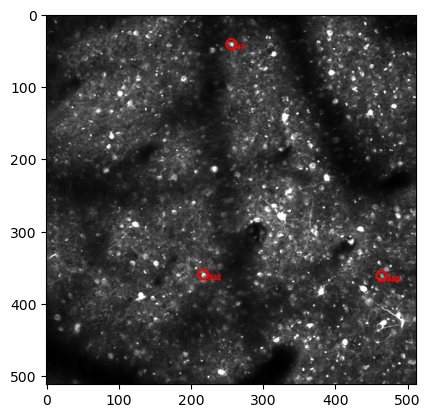

In [9]:
cell_example_list = [47,322,338]
avr_graph = ac.global_avr
annotated_avr_graph = ac.Annotate_Cell(namelist=cell_example_list)
plt.imshow(annotated_avr_graph)

___
#### Fig 1D & Fig 1E
Below will show comparation between stim and spon of the same cell are calculated.

In [14]:
# Get stim and spon's response dF/F matrix.
orien_dff_series = pd.DataFrame(ac.Get_dFF_Frames(ac.orienrun,0.1))
spon_dff_series = pd.DataFrame(ac.Get_dFF_Frames('1-001',0.1,8500,13852))

# Get Time of Stim-ON in stimulus frame.
stim_od_ids = (np.array(ac.Stim_Frame_Align['Run007']['Original_Stim_Train'])>0).astype('i4')
series_str = ''.join(map(str,stim_od_ids))
matches = re.finditer('1+', series_str) # this will get all start time of data.
start_times_ids = []
for match in matches:
    start_times_ids.append(match.start())



<Figure size 640x480 with 0 Axes>

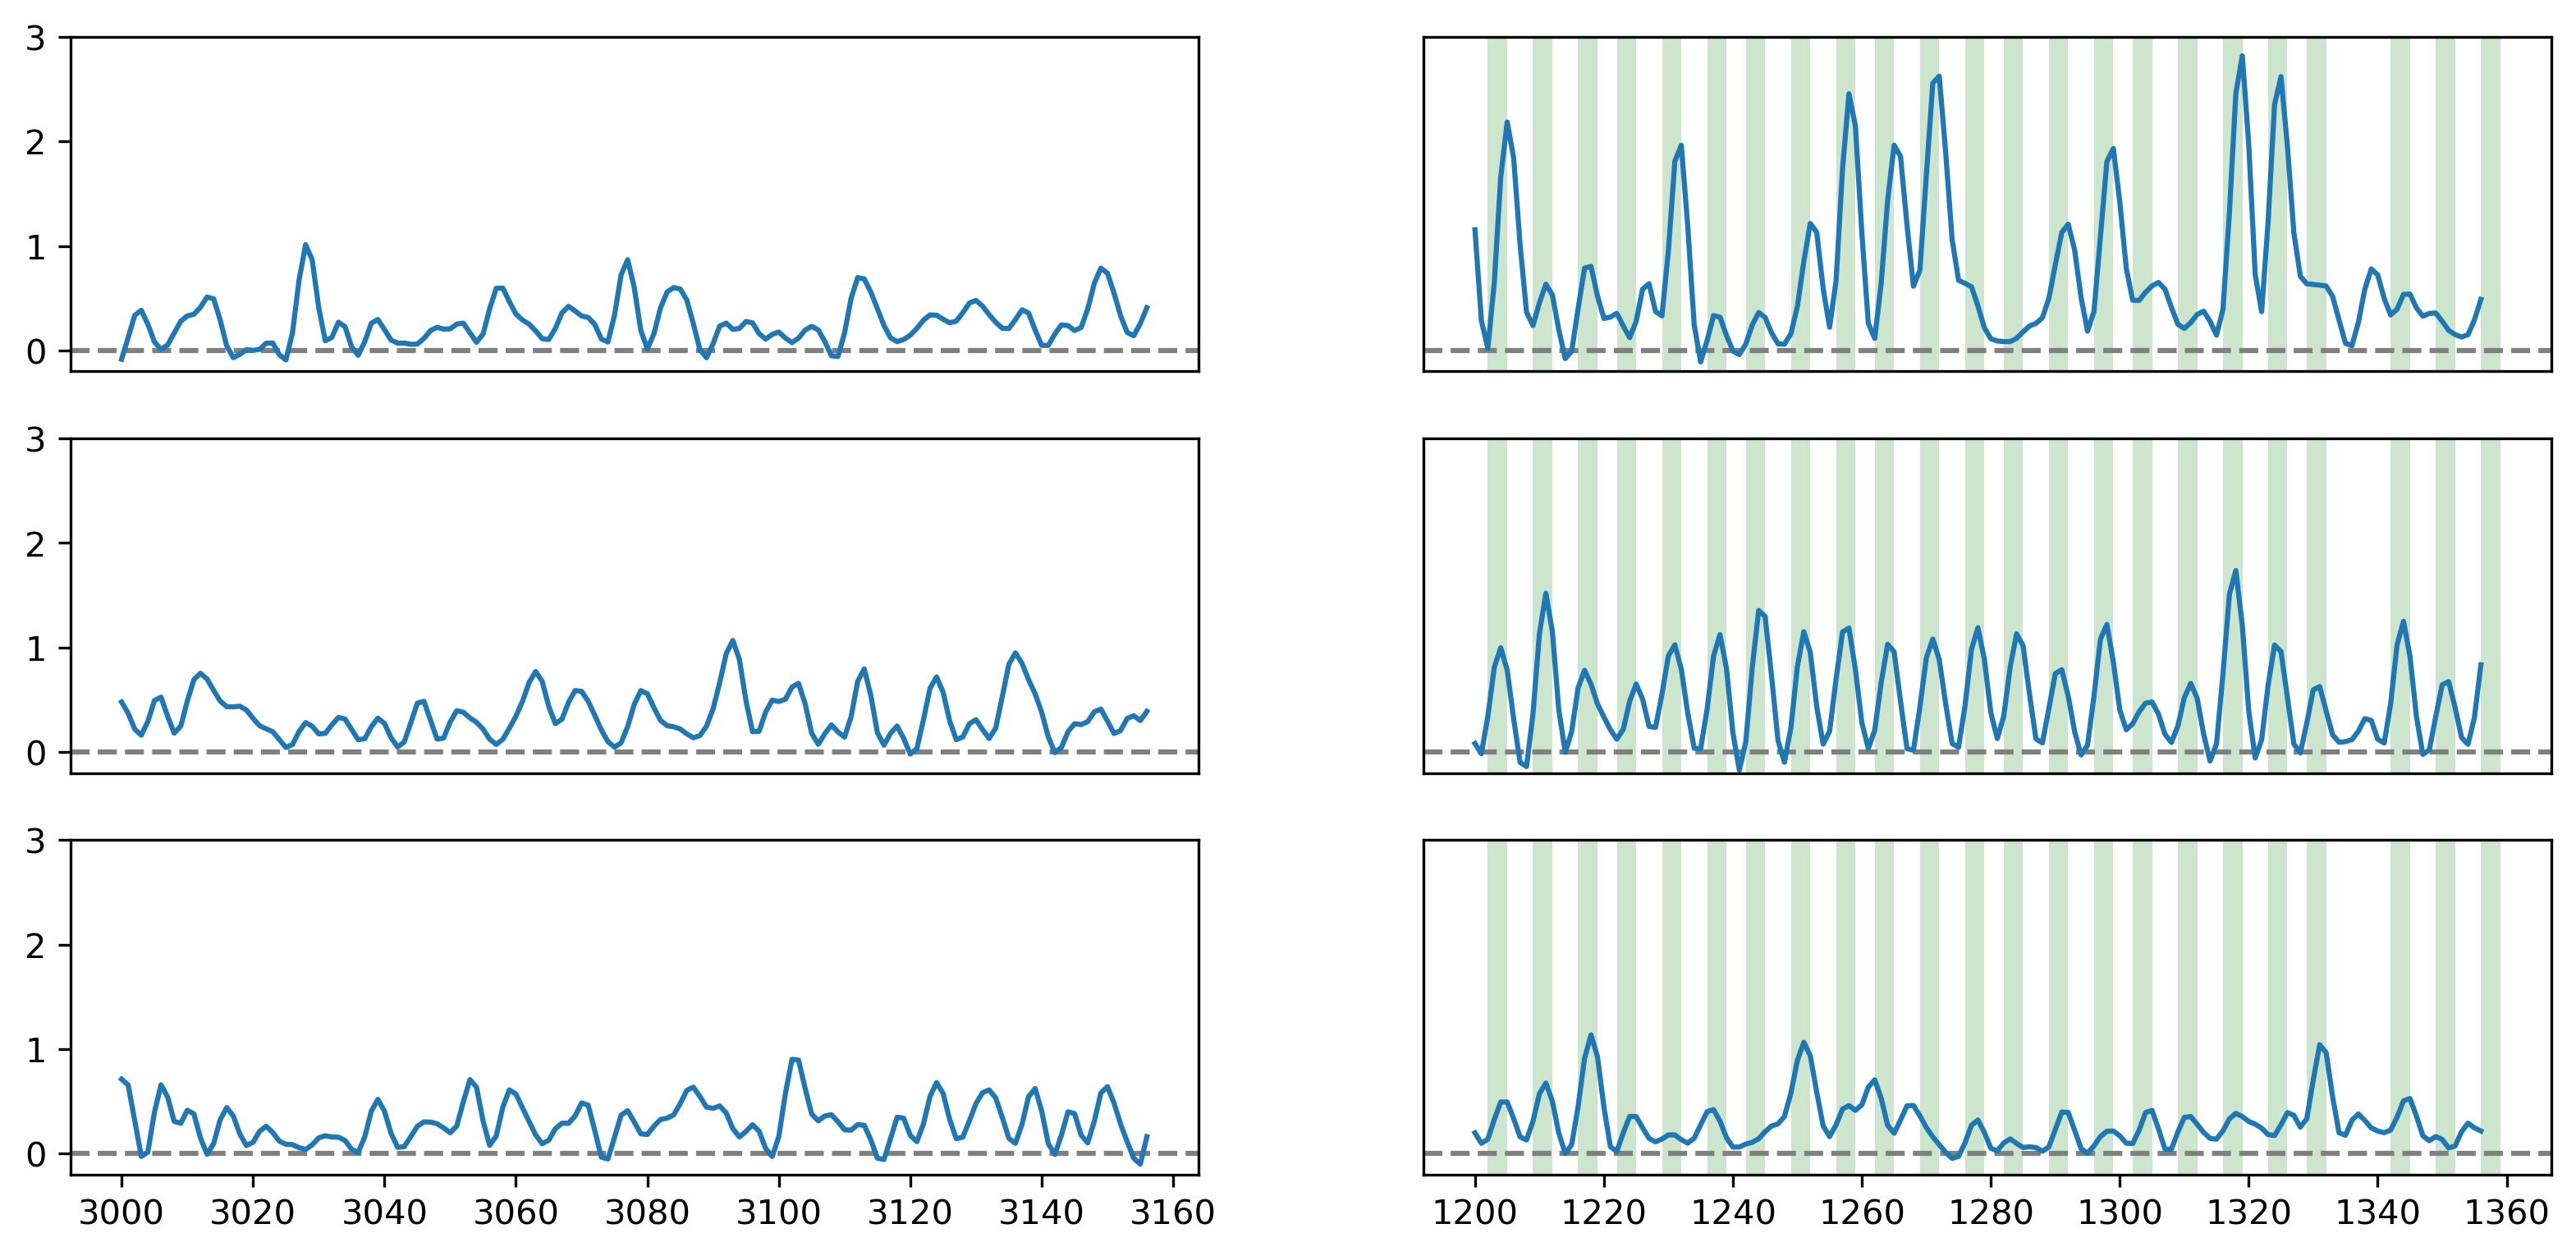

In [18]:
# Example time of spon and stim compare.
fps = 1.301
time_dur = 120*fps
spon_start = 3000
stim_start = 1200

# Plot example Locations.
plt.cla()
plt.clf()
fontsize = 20
rows = ['Cell {}'.format(row) for row in cell_example_list]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(13, 6),sharey = 'row',sharex = 'col',dpi = 300)

# plot an zero line for all graphs.
for i in range(3):
    for j in range(2):
        axes[i,j].axhline(0, color='gray', linestyle='--')

# Use time range 1200-1400 frane, and spon series 3000-3200
start_times_ids = np.array(start_times_ids)
start_times_ids = start_times_ids[(start_times_ids>stim_start)*(start_times_ids<stim_start+time_dur)] # get stim on range.

for i,cc in enumerate(cell_example_list): # i cells, remember that cell ID and 
    c_spon_series = spon_dff_series.loc[spon_start:spon_start+time_dur,cc-1]
    c_stim_series = orien_dff_series.loc[stim_start:stim_start+time_dur,cc-1]
    # axes[i,0].set(ylim = (-3,5.5))
    axes[i,1].set(ylim = (-0.2,3))
    axes[i,1].set_yticks([0,1,2,3])
    axes[i,1].set_yticklabels([0,1,2,3])
    # axes[i,1].set(ylim = (-3,5.5))
    axes[i,1].plot(c_stim_series)
    axes[i,0].plot(c_spon_series)
    for j,c_stim in enumerate(start_times_ids):
        axes[i,1].axvspan(xmin = c_stim,xmax = c_stim+3,alpha = 0.2,facecolor='g',edgecolor=None) # fill stim on 
    # beautiful hacking.
    axes[i,1].yaxis.set_visible(False)
    axes[i,0].xaxis.set_visible(False)
    axes[i,1].xaxis.set_visible(False)
    # axes[i,0].set_ylabel('dF/F',size = 14)
    axes[i,0].yaxis.set_label_coords(-0.04, 0.5) # align y labels.

    if i ==2: # lase row
        axes[i,0].xaxis.set_visible(True)
        axes[i,1].xaxis.set_visible(True)
        # axes[i,0].set_xlabel('Time (s)',size = 14)
        # axes[i,1].set_xlabel('Time (s)',size = 14)